In [67]:
from astropy.constants import M_earth, R_earth, G
from astropy import units
from math import pi, sqrt, cos
# from prior spread sheet
M_moon = 7.34767309e22*units.kg
R_moon = 1737.0*units.km

In [68]:
mu = G*M_moon
print mu

4.90389580165e+12 m3 / s2


Calculation of catching velocity

In [69]:
R_llo = 100*units.km+R_moon
print R_llo

1837.0 km


In [70]:
# hohmann transfer
# sqrt(mu/r1) * (sqrt(2 r2/(r1 + r2)) - 1)
v_trans = ((mu/R_moon)**(0.5))*(sqrt(2*R_llo/(R_llo + R_moon)) - 1)
v_trans = v_trans.decompose()
print v_trans

23.3442366858 m / s


Variations in catching location with launch speed errors

In [71]:
v1 = v_trans + (mu/R_moon)**(0.5)
print v1

1703.58186991 m / s


In [72]:
# equation 1.18
# https://www.scss.tcd.ie/Stephen.Farrell/ipn/background/Braeunig/orbmech1.htm_newton
# Ra = Rp / [2 x GM / (Vp2 x Rp) - 1]
def Ra_calc(Rp, Vp):
    return Rp/(2*mu/(Rp*Vp**2)-1)

In [73]:
# sanity check, the altitude the predicted gun velocity would give us
print Ra_calc(R_moon, v1) - R_moon  # Same as LLO altitude we already put in
print Ra_calc(R_moon, v1 + 1.0*units.m/units.s) - R_llo  # altitude we miss by, given 1 m/s error
print (Ra_calc(R_moon, v1 + 0.1*units.m/units.s) - R_llo).si  # altitude we miss by, given 0.1 m/s error
print (Ra_calc(R_moon, v1 + 0.01*units.m/units.s) - R_llo).si  # altitude we miss by, given 0.01 m/s error
print (Ra_calc(R_moon, v1 + 0.001*units.m/units.s) - R_llo).si  # altitude we miss by, given 0.001 m/s error

100.0 km
4.44424533678 km
443.810471265 m
44.3749154938 m
4.43743024266 m


Consideration of a shortcut, more vertical, launch path

In [74]:
# Velocity at catch
# orbital specific energy is constant
v2 = (v1**2 + 2*mu*(1/R_llo-1/R_moon))**0.5
print v2
v_catch = v2 - (mu/R_llo)**0.5
print v_catch

1610.84469681 m / s
-23.0198107262 m / s


In [75]:
v_catch/v1

<Quantity -0.013512594335928949>

In [76]:
# alternative, launch at 1-to-100 rise-to-run ratio
# the run would be ballpark
(100*units.km)*100/(2*pi*R_moon)  # pretty much the same

<Quantity 0.9162633453764845>

Variations in catching velocity with horizontal direction errors

In [77]:
# cross-velocity if alignment is bad
print v2*1*pi/180.  # for 1 degree mis-alignment
print v2*0.1*pi/180.  # for 0.1 degree mis-alignment

28.1145436976 m / s
2.81145436976 m / s


Calculation of separation distance needed at point of launch

In [78]:
# semi-major axis of projectile
a_proj = 0.5*(R_moon + R_llo)
print a_proj

1787.0 km


In [79]:
# Period
# T = 2 pi sqrt(a^3/mu)
T_proj = 2*pi*(a_proj**3/mu)**0.5
T_proj = T_proj.decompose()
print T_proj
T_station = 2*pi*(R_llo**3/mu)**0.5
T_station = T_station.decompose()
print T_station

6777.91440862 s
7064.36265434 s


In [80]:
# The time delta between overhead pass and firing
delta_t = 0.5*(T_station-T_proj)
print delta_t
# distance of separation (horizontally) when fired
v_llo = (mu/R_llo)**(0.5)
v_llo = v_llo.decompose()
print v_llo
delta_x = delta_t*v_llo
print delta_x.to(units.km)

143.224122857 s
1633.86450754 m / s
234.008810959 km


Finding the rise of the orbit with downrange distance

In [81]:
# the orbit equation
# r=l^2 / (m^2 mu ) * 1 / (1 + e cos theta ) = lp^2 / mu * 1 / (1 + e cos theta )
# e = (Ra-Rp)/(Ra+Rp)
# l = m r^2 dtheta/dt = angular momentum = rmv
# lp = rv = l/m
e = (R_llo-R_moon)/(R_llo+R_moon)
lp = v1*R_moon
print e
print lp

0.0279798545048
2959121.70804 km m / s


In [82]:
def rise(theta):
    r = lp**2/(mu*(1+e*cos(theta)))
    return r.decompose()

def rise_downrange(x):
    return (rise(x/(R_moon)) - R_moon)

In [83]:
# sanity checks
print rise_downrange(0*units.m)
print rise_downrange(1*units.m)
print rise_downrange(10*units.m)
print rise_downrange(1*units.km)
print rise_downrange(10*units.km)
print rise_downrange(50*units.km)
print rise_downrange(100*units.km)
print rise_downrange(1000*units.km)

2.32830643654e-10 m
7.68341124058e-09 m
7.83707946539e-07 m
0.00783485593274 m
0.783483816544 m
19.5860090861 m
78.3304576443 m
7654.41909606 m


In [84]:
import matplotlib.pyplot as plt
import numpy as np

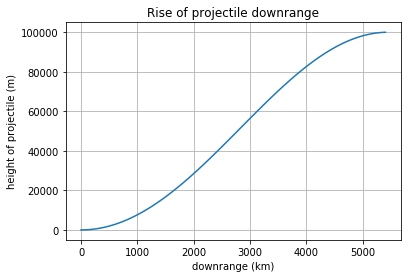

In [85]:
upper = pi*R_moon/units.km
distances = []
for i in range(100):
    distances.append(upper*i/100)
alts = [rise_downrange(r*units.km)/units.m for r in distances]
plt.plot(distances, alts)
plt.xlabel('downrange (km)')
plt.ylabel('height of projectile (m)')
plt.title('Rise of projectile downrange')
plt.grid(True)
plt.savefig("downrange_rise.png")
plt.show()

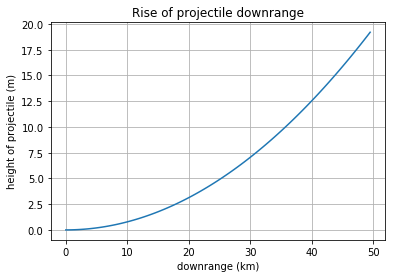

In [110]:
upper = 50.
distances = []
for i in range(100):
    distances.append(upper*i/100)
alts = [rise_downrange(r*units.km)/units.m for r in distances]
plt.plot(distances, alts)
plt.xlabel('downrange (km)')
plt.ylabel('height of projectile (m)')
plt.title('Rise of projectile downrange')
plt.grid(True)
plt.savefig("downrange_rise.png")
plt.show()

Energy considerations for launch

In [86]:
# specific energy of material launched
0.5*v1**2

<Quantity 1451095.5937499697 m2 / s2>

In [87]:
# https://en.wikipedia.org/wiki/Space-based_solar_power#Launch_costs
# 4 GW / 80,000 metric tons
4000*50/80000  # say mass is 50 tons

2

In [96]:
e_orbit = T_station*2000*units.W
print e_orbit
m_launch = e_orbit/(0.5*v1**2)
m_launch = m_launch.decompose()
print m_launch

14128725.3087 s W
9.73659169632 kg


In [107]:
# payoff time
(50*units.t/m_launch*T_station).to(units.day)

<Quantity 419.8771972656162 d>